<a href="https://oneacrefund.org/"><img src="https://i.ibb.co/z7Y8sFT/one-acre-fund-1.jpg" alt="one-acre-fund-1" width ="500" border="0" /></a>
<h1><b> One Acre Fund Written Assessment <b></h1> 

### Jean Paul Tuyikunde
### March 30, 2022
## Assignment 2

## Table of Contents
* [Business Problem](#intro)
* [Data](#Data)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Modelling](#Modelling)
* [Results and Discussions](#Results)
* [Conclusion](#Conclusion)

## Business Problem <a name ="intro"></a>

In this project, we will be focusing on Learning and exploring the *Effects* of **Market Orientation** to farmers in Rwanda, and suggest households characteristics of that explains market orientation.

This report will help One Acre fund in investigating those effects, improving farming households nutrient security, but also eradicating hunger.

We will use the DataScience toolbox and other researches to provide informations to stakeholders and recommend them the optimal steps to enhance farmers dietary diversity.

## Data <a name="Data"></a>

Regarding the data we will use data collected extensively by **One Acre Fund** from their client through digital survey.

## Methodology

The goal of this project is to analyse the effects of **Market orientation** on household dynamics,by considering number of food consumed by group, Income to the group and how regionality factors affect it.

First step will be identifying the number of households in every survey and their gender, this will help in preventing bias in decision making.

Secondly, we will identify and analyse percentage of sold crops, Sales income to group, location effects to dietary diversity of household.

we will use a Logistic regression Model to predict dietary using mentioned factors

## Analysis

### I. Data Exploration

In [1]:
import pandas as pd

In [2]:
# Read the data
full_data = pd.read_csv('./Data/Survey_Data.csv', index_col=0)

# View first five rows of data
full_data.head()

,respondentNr,surveyQuestions.location.sector,surveyQuestions.location.village,surveyQuestions.location.countryGroup._geopoint_altitude,surveyQuestions.location.countryGroup.country,surveyQuestions.location.countryGroup.currency,surveyQuestions.location.district,surveyQuestions.HHH.genderHH,surveyQuestions.HHH.ageHH,surveyQuestions.HHH.maritalStatusHH,...,surveyQuestions.foodSecurity.dietaryDiversity1.meat,surveyQuestions.foodSecurity.dietaryDiversity1.eggs,surveyQuestions.foodSecurity.dietaryDiversity2.fish,surveyQuestions.foodSecurity.dietaryDiversity2.legumes,surveyQuestions.foodSecurity.dietaryDiversity2.dairy,surveyQuestions.foodSecurity.dietaryDiversity2.fat,surveyQuestions.foodSecurity.dietaryDiversity2.sugar,surveyQuestions.foodSecurity.dietaryDiversity2.other,surveyQuestions.infoSources.training,surveyQuestions.cassavaFertGroup.fertilizer_reason_more.other.y
1,1,Ntyazo,Kimigunga,1540.300049,Rwanda,RWF,Nyanza,male,45,married,...,no,no,no,yes,no,yes,yes,no,yes,NaN
2,2,Ntyazo,Mande,1537.800049,Rwanda,RWF,Nyanza,female,45,married,...,no,no,yes,yes,yes,yes,no,no,yes,False
3,3,Muyira,Rugese,1565.099976,Rwanda,RWF,Nyanza,male,54,married,...,no,no,no,yes,no,yes,yes,yes,yes,NaN
4,4,Ntyazo,Kimigunga,1537.699951,Rwanda,RWF,Nyanza,male,65,married,...,no,no,yes,yes,no,yes,no,no,yes,NaN
5,5,Ntyazo,Mande,1556.400024,Rwanda,RWF,Nyanza,male,35,married,...,no,no,yes,yes,no,yes,no,no,yes,NaN


In [3]:
#The shape of our data
print('Shape of our data:', full_data.shape)

Shape of our data: (240, 176)


We can see that we have 240 households interview from the dataset

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 240
Columns: 176 entries, respondentNr to surveyQuestions.cassavaFertGroup.fertilizer_reason_more.other.y
dtypes: bool(1), float64(69), int64(8), object(98)
memory usage: 330.2+ KB


In [5]:
full_data.dtypes.value_counts().to_frame()

,0
object,98
float64,69
int64,8
bool,1


Before processiding to other analysis, we can do a bit of cleaning on Columns of our data, since they are too long by names and we can rename them to a short names. we can accomplish this by using `rename` methods or replacing `str` across columns.
as you can see there's a repeating words across all columns **surveyQuestions.**, we can replace this.

In [16]:
#rename surveyQuestions with blank in every column name
full_data.columns = full_data.columns.str.replace('surveyQuestions', '')
full_data.columns = full_data.columns.str.replace('.location', '')
full_data.columns = full_data.columns.str.replace('.HHH', '')
full_data.columns = full_data.columns.str.replace('.countryGroup', '')
full_data.columns = full_data.columns.str.replace('.livestockGroup.livestockCount', '')
full_data.columns = full_data.columns.str.replace('.cropGroup', '')
full_data.columns = full_data.columns.str.replace('.inputGroup.inputs', '')
full_data.columns = full_data.columns.str.replace('.cashGroup', '')
full_data.columns = full_data.columns.str.replace('.foodSecurity', '')
full_data.head()

,respondentNr,.sector,.village,.countryGroup._geopoint_altitude,.countryGroup.country,.countryGroup.currency,.district,.genderHH,.ageHH,.maritalStatusHH,...,.dietaryDiversity1.meat,.dietaryDiversity1.eggs,.dietaryDiversity2.fish,.dietaryDiversity2.legumes,.dietaryDiversity2.dairy,.dietaryDiversity2.fat,.dietaryDiversity2.sugar,.dietaryDiversity2.other,.infoSources.training,.cassavaFertGroup.fertilizer_reason_more.other.y
1,1,Ntyazo,Kimigunga,1540.300049,Rwanda,RWF,Nyanza,male,45,married,...,no,no,no,yes,no,yes,yes,no,yes,NaN
2,2,Ntyazo,Mande,1537.800049,Rwanda,RWF,Nyanza,female,45,married,...,no,no,yes,yes,yes,yes,no,no,yes,False
3,3,Muyira,Rugese,1565.099976,Rwanda,RWF,Nyanza,male,54,married,...,no,no,no,yes,no,yes,yes,yes,yes,NaN
4,4,Ntyazo,Kimigunga,1537.699951,Rwanda,RWF,Nyanza,male,65,married,...,no,no,yes,yes,no,yes,no,no,yes,NaN
5,5,Ntyazo,Mande,1556.400024,Rwanda,RWF,Nyanza,male,35,married,...,no,no,yes,yes,no,yes,no,no,yes,NaN


With these new names, we can see clearly meaningfull names, but we still have a dot **(.)** among names, since all names are self explanatory, we can remove that too.

In [19]:
full_data.columns = full_data.columns.str.replace('[.]', '_')
full_data.head()

,respondentNr,sector,village,countryGroup_geopoint_altitude,countryGroupcountry,countryGroupcurrency,district,genderHH,ageHH,maritalStatusHH,...,dietaryDiversity1meat,dietaryDiversity1eggs,dietaryDiversity2fish,dietaryDiversity2legumes,dietaryDiversity2dairy,dietaryDiversity2fat,dietaryDiversity2sugar,dietaryDiversity2other,infoSourcestraining,cassavaFertGroupfertilizer_reason_moreothery
1,1,Ntyazo,Kimigunga,1540.300049,Rwanda,RWF,Nyanza,male,45,married,...,no,no,no,yes,no,yes,yes,no,yes,NaN
2,2,Ntyazo,Mande,1537.800049,Rwanda,RWF,Nyanza,female,45,married,...,no,no,yes,yes,yes,yes,no,no,yes,False
3,3,Muyira,Rugese,1565.099976,Rwanda,RWF,Nyanza,male,54,married,...,no,no,no,yes,no,yes,yes,yes,yes,NaN
4,4,Ntyazo,Kimigunga,1537.699951,Rwanda,RWF,Nyanza,male,65,married,...,no,no,yes,yes,no,yes,no,no,yes,NaN
5,5,Ntyazo,Mande,1556.400024,Rwanda,RWF,Nyanza,male,35,married,...,no,no,yes,yes,no,yes,no,no,yes,NaN


In [26]:
# checking missing values
full_data.isnull().sum().sort_values().to_frame()

,0
respondentNr,0
dietaryDiversity2legumes,0
dietaryDiversity2fish,0
dietaryDiversity1eggs,0
dietaryDiversity1meat,0
...,...
cropRepeat4cropDetailsbananaUnits,240
inputRepeat6cassavaSelected,240
inputRepeat7cassavaSelected,240
livestock_beehives,240


We can see there is some survey questions where there was no answer across all interviewed households

In [27]:
full_data.describe()

,respondentNr,countryGroup_geopoint_altitude,ageHH,assetscashSpending,farmfarmSize,farmlandOwned,travelGroupmarketTravel,travelGroupagrodealerTravel,livestock_cattle,livestock_sheep,...,inputRepeat7inputDetailsinputAmount,inputRepeat7cassavaSelected,inputRepeat7inputCropGroupinputCropRepeat_count,inputRepeatinputCropGroupinputCropRepeat_count,inputRepeat1inputCropGroupinputCropRepeat1inputCropDetailsinputCropAmount,inputRepeat2inputCropGroupinputCropRepeat1inputCropDetailsinputCropAmount,inputRepeat3inputCropGroupinputCropRepeat1inputCropDetailsinputCropAmount,inputRepeat3inputCropGroupinputCropRepeat2inputCropDetailsinputCropAmount,inputRepeat3inputCropGroupinputCropRepeat3inputCropDetailsinputCropAmount,offfarmincomefarmProportion
count,240.00000,240.000000,240.000000,239.000000,240.000000,239.000000,240.000000,240.000000,138.000000,4.000000,...,1.0,0.0,2.000000,0.0,216.000000,111.000000,73.000000,45.000000,30.000000,127.000000
mean,120.50000,1638.001664,48.925000,5610.878661,81.839456,0.661506,49.783333,37.225000,1.594203,3.000000,...,3.0,NaN,2.500000,NaN,310.686111,252.763072,623.554795,1128.883378,1122.983333,0.514173
std,69.42622,100.552246,13.678106,5675.012204,577.867443,0.389035,40.409863,34.396157,0.986313,3.366502,...,NaN,NaN,0.707107,NaN,698.712587,1447.643403,1910.469032,4495.428445,2887.826353,0.348915
min,1.00000,1379.699951,24.000000,300.000000,0.015000,0.000000,0.000000,1.000000,1.000000,1.000000,...,3.0,NaN,2.000000,NaN,0.000000,0.001000,1.000000,0.002000,1.000000,0.000000
25%,60.75000,1566.224976,38.000000,2000.000000,1.000000,0.250000,20.000000,10.000000,1.000000,1.000000,...,3.0,NaN,2.250000,NaN,5.000000,3.000000,10.000000,35.000000,50.000000,0.250000
50%,120.50000,1647.049988,46.000000,4000.000000,3.000000,0.750000,40.000000,30.000000,1.000000,1.500000,...,3.0,NaN,2.500000,NaN,67.500000,10.000000,100.000000,125.000000,200.000000,0.500000
75%,180.25000,1714.149994,58.000000,7000.000000,25.000000,1.000000,60.000000,60.000000,2.000000,3.500000,...,3.0,NaN,2.750000,NaN,210.000000,100.000000,300.000000,500.000000,575.000000,0.750000
max,240.00000,1878.699951,90.000000,30000.000000,7666.000000,1.000000,180.000000,180.000000,6.000000,8.000000,...,3.0,NaN,3.000000,NaN,5000.000000,15000.000000,15000.000000,30000.000000,15000.000000,1.000000


### II. Exploratory Data Analysis

After looking in my data, I plan not to use all columns in the exploratory data analysis, I will subset some columns, those include personal data( but not *sensitive* ones ex: Marital Status), location data, etc...

In [33]:
#columns needed
cols = ['respondentNr',
 'sector',
 'district',
 'genderHH',
 'ageHH',
 'assetscashSpending',
 'farmfarmSize',
 'farmunitsFarmSize',
 'farmlandOwned',
 'travelGroupmarketTravel',
 'travelGroupagrodealerTravel',
 'mainCropCount',
 'cropRepeat_count',
 'cropRepeat1cropLabel',
 'cropRepeat1cropDetailscropProp',
 'cropRepeat1cropDetailscropHarvest',
 'cropRepeat1cropDetailscropUnits',
 'cropRepeat1cropDetailscropSold',
 'cropRepeat1cropSalecropIncome',
 'cropRepeat1cropSalemarketType',
 'cropRepeat2cropPosition',
 'cropRepeat2cropLabel',
 'cropRepeat2cropDetailscropProp',
 'cropRepeat2cropDetailscropHarvest',
 'cropRepeat2cropDetailscropUnits',
 'cropRepeat2cropDetailscropSold',
 'cropRepeat2cropSalecropIncome',
 'cropRepeat2cropSalemarketType',
 'cropRepeat3cropPosition',
 'cropRepeat3cropLabel',
 'cropRepeat3cropDetailscropProp',
 'cropRepeat3cropDetailscropHarvest',
 'cropRepeat3cropDetailscropUnits',
 'cropRepeat3cropDetailscropSold',
 'cropRepeat3cropSalecropIncome',
 'cropRepeat3cropSalemarketType',
 'cropRepeat3cropSalecontract',
 'cropRepeat4cropPosition',
 'cropRepeat4cropLabel',
 'cropRepeat4cropDetailscropProp',
 'cropRepeat4cropDetailscropHarvest',
 'cropRepeat4cropDetailscropUnits',
 'cropRepeat4cropDetailscropSold',
 'cropRepeat4cropSalecropIncome',
 'cropRepeat5cropPosition',
 'cropRepeat5cropLabel',
 'cropRepeat5cropDetailscropProp',
 'cropRepeat5cropDetailscropHarvest',
 'cropRepeat5cropDetailscropUnits',
 'cropRepeat5cropDetailscropSold',
 'cropRepeat5cropSalecropIncome']
#subsetting data
sub_data = full_data.loc[:, cols].copy()
sub_data

,respondentNr,sector,district,genderHH,ageHH,assetscashSpending,farmfarmSize,farmunitsFarmSize,farmlandOwned,travelGroupmarketTravel,...,cropRepeat4cropDetailscropUnits,cropRepeat4cropDetailscropSold,cropRepeat4cropSalecropIncome,cropRepeat5cropPosition,cropRepeat5cropLabel,cropRepeat5cropDetailscropProp,cropRepeat5cropDetailscropHarvest,cropRepeat5cropDetailscropUnits,cropRepeat5cropDetailscropSold,cropRepeat5cropSalecropIncome
1,1,Ntyazo,Nyanza,male,45,10000.0,2300.0,m2,0.75,120,...,kg,0.45,4000.0,potatoSweet,Ibijumba,0.35,10.0,sacks_50kg,0.45,4000.0
2,2,Ntyazo,Nyanza,female,45,5000.0,1.0,ha,0.75,30,...,kg,0.00,NaN,soybean,Soya,0.35,38.0,kg,0.85,11550.0
3,3,Muyira,Nyanza,male,54,15000.0,2.0,ha,1.00,10,...,kg,0.00,NaN,sorghum,Amasaka,0.25,40.0,kg,0.00,NaN
4,4,Ntyazo,Nyanza,male,65,2000.0,15.0,are,0.50,90,...,kg,0.00,NaN,potatoIrish,Ibirayi,0.05,20.0,kg,0.00,NaN
5,5,Ntyazo,Nyanza,male,35,1000.0,12.6,are,0.50,20,...,kg,0.00,NaN,potatoSweet,Ibijumba,0.05,60.0,kg,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,236,Rugarika,Kamonyi,female,31,8000.0,2.0,ha,0.75,15,...,kg,0.15,1400.0,potatoSweet,Ibijumba,0.05,30.0,kg,0.00,NaN
237,237,Rugarika,Kamonyi,male,36,30000.0,2.0,ha,0.25,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,238,Rugarika,Kamonyi,female,60,2000.0,20.0,are,0.25,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,239,Rugarika,Kamonyi,male,30,5000.0,2.5,are,0.50,60,...,kg,0.95,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#summary of our subset
sub_data.describe()

,respondentNr,ageHH,assetscashSpending,farmfarmSize,farmlandOwned,travelGroupmarketTravel,travelGroupagrodealerTravel,mainCropCount,cropRepeat_count,cropRepeat1cropDetailscropProp,...,cropRepeat3cropDetailscropSold,cropRepeat3cropSalecropIncome,cropRepeat4cropDetailscropProp,cropRepeat4cropDetailscropHarvest,cropRepeat4cropDetailscropSold,cropRepeat4cropSalecropIncome,cropRepeat5cropDetailscropProp,cropRepeat5cropDetailscropHarvest,cropRepeat5cropDetailscropSold,cropRepeat5cropSalecropIncome
count,240.00000,240.000000,239.000000,240.000000,239.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,225.000000,105.000000,174.000000,151.000000,173.000000,77.000000,88.000000,77.000000,88.000000,37.000000
mean,120.50000,48.925000,5610.878661,81.839456,0.661506,49.783333,37.225000,3.966667,3.966667,0.368542,...,0.264222,65743.809524,0.203161,339.377483,0.275145,70213.766234,0.201136,146.467532,0.251705,29720.270270
std,69.42622,13.678106,5675.012204,577.867443,0.389035,40.409863,34.396157,0.914169,0.914169,0.193838,...,0.345600,146830.426083,0.138024,1024.141310,0.369460,136418.725804,0.177138,275.500291,0.344451,30765.717436
min,1.00000,24.000000,300.000000,0.015000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,60.75000,38.000000,2000.000000,1.000000,0.250000,20.000000,10.000000,3.000000,3.000000,0.250000,...,0.000000,7500.000000,0.150000,30.000000,0.000000,7000.000000,0.050000,10.000000,0.000000,6200.000000
50%,120.50000,46.000000,4000.000000,3.000000,0.750000,40.000000,30.000000,4.000000,4.000000,0.350000,...,0.000000,18000.000000,0.150000,100.000000,0.000000,20000.000000,0.150000,50.000000,0.000000,16000.000000
75%,180.25000,58.000000,7000.000000,25.000000,1.000000,60.000000,60.000000,5.000000,5.000000,0.450000,...,0.550000,45000.000000,0.250000,240.000000,0.650000,75000.000000,0.250000,200.000000,0.550000,40000.000000
max,240.00000,90.000000,30000.000000,7666.000000,1.000000,180.000000,180.000000,5.000000,5.000000,0.950000,...,0.950000,1000000.000000,0.750000,10800.000000,0.950000,944000.000000,0.850000,1500.000000,0.950000,120000.000000


**Crop Data**

We can start exploring the subset of Our data using Data visualization with help of Matplotlib and seaborn library

In [43]:
#columns needed
crops_cols = ['respondentNr',
  'cropRepeat_count',
 'cropRepeat1cropLabel',
 'cropRepeat1cropDetailscropProp',
 'cropRepeat1cropDetailscropHarvest',
 'cropRepeat1cropDetailscropSold',
 'cropRepeat1cropSalecropIncome',
 'cropRepeat1cropSalemarketType',
 'cropRepeat2cropPosition',
 'cropRepeat2cropLabel',
 'cropRepeat2cropDetailscropProp',
 'cropRepeat2cropDetailscropHarvest',
 'cropRepeat2cropDetailscropSold',
 'cropRepeat2cropSalecropIncome',
 'cropRepeat2cropSalemarketType',
 'cropRepeat3cropPosition',
 'cropRepeat3cropLabel',
 'cropRepeat3cropDetailscropProp',
 'cropRepeat3cropDetailscropHarvest',
 'cropRepeat3cropDetailscropSold',
 'cropRepeat3cropSalecropIncome',
 'cropRepeat3cropSalemarketType',
 'cropRepeat3cropSalecontract',
 'cropRepeat4cropPosition',
 'cropRepeat4cropLabel',
 'cropRepeat4cropDetailscropProp',
 'cropRepeat4cropDetailscropHarvest',
 'cropRepeat4cropDetailscropSold',
 'cropRepeat4cropSalecropIncome',
 'cropRepeat5cropPosition',
 'cropRepeat5cropLabel',
 'cropRepeat5cropDetailscropProp',
 'cropRepeat5cropDetailscropHarvest',
 'cropRepeat5cropDetailscropSold',
 'cropRepeat5cropSalecropIncome']
crops_data = sub_data.loc[:, crops_cols].copy()
crops_data.head()

,respondentNr,cropRepeat_count,cropRepeat1cropLabel,cropRepeat1cropDetailscropProp,cropRepeat1cropDetailscropHarvest,cropRepeat1cropDetailscropSold,cropRepeat1cropSalecropIncome,cropRepeat1cropSalemarketType,cropRepeat2cropPosition,cropRepeat2cropLabel,...,cropRepeat4cropDetailscropProp,cropRepeat4cropDetailscropHarvest,cropRepeat4cropDetailscropSold,cropRepeat4cropSalecropIncome,cropRepeat5cropPosition,cropRepeat5cropLabel,cropRepeat5cropDetailscropProp,cropRepeat5cropDetailscropHarvest,cropRepeat5cropDetailscropSold,cropRepeat5cropSalecropIncome
1,1,5,Ibishyimbo bigufi,0.15,20.0,0.00,NaN,NaN,cassava,Imyumbati,...,0.25,20.0,0.45,4000.0,potatoSweet,Ibijumba,0.35,10.0,0.45,4000.0
2,2,5,Ibishyimbo bigufi,0.85,200.0,0.45,30000.0,market,cassava,Imyumbati,...,0.25,NaN,0.00,NaN,soybean,Soya,0.35,38.0,0.85,11550.0
3,3,5,Ibishyimbo bigufi,0.55,400.0,0.45,60000.0,market,cassava,Imyumbati,...,0.15,NaN,0.00,NaN,sorghum,Amasaka,0.25,40.0,0.00,NaN
4,4,5,Imbogeri,0.05,15.0,0.00,NaN,NaN,beansBush,Ibishyimbo bigufi,...,0.15,40.0,0.00,NaN,potatoIrish,Ibirayi,0.05,20.0,0.00,NaN
5,5,5,Ibishyimbo bigufi,0.75,100.0,0.15,20000.0,market,cassava,Imyumbati,...,0.25,20.0,0.00,NaN,potatoSweet,Ibijumba,0.05,60.0,0.00,NaN


**Dietary Data**

In [116]:
#columns needed for Dietary Data
diet_cols = ['respondentNr',
 'district',
'dietaryDiversity1starch',
 'dietaryDiversity1tubers',
 'dietaryDiversity1vegetables',
 'dietaryDiversity1fruits',
 'dietaryDiversity1meat',
 'dietaryDiversity1eggs',
 'dietaryDiversity2fish',
 'dietaryDiversity2legumes',
 'dietaryDiversity2dairy',
 'dietaryDiversity2fat',
 'dietaryDiversity2sugar',
 'dietaryDiversity2other', 
]
diet_data = full_data.loc[:, diet_cols].copy()
diet_data.head()

,respondentNr,district,dietaryDiversity1starch,dietaryDiversity1tubers,dietaryDiversity1vegetables,dietaryDiversity1fruits,dietaryDiversity1meat,dietaryDiversity1eggs,dietaryDiversity2fish,dietaryDiversity2legumes,dietaryDiversity2dairy,dietaryDiversity2fat,dietaryDiversity2sugar,dietaryDiversity2other
1,1,Nyanza,yes,no,no,no,no,no,no,yes,no,yes,yes,no
2,2,Nyanza,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no,no
3,3,Nyanza,yes,yes,yes,yes,no,no,no,yes,no,yes,yes,yes
4,4,Nyanza,yes,no,yes,no,no,no,yes,yes,no,yes,no,no
5,5,Nyanza,yes,no,yes,no,no,no,yes,yes,no,yes,no,no


In [54]:
# dropping missing values
crops_data.dropna()
crops_data.shape

(240, 35)

In [55]:
crops_data.head()

,respondentNr,cropRepeat_count,cropRepeat1cropLabel,cropRepeat1cropDetailscropProp,cropRepeat1cropDetailscropHarvest,cropRepeat1cropDetailscropSold,cropRepeat1cropSalecropIncome,cropRepeat1cropSalemarketType,cropRepeat2cropPosition,cropRepeat2cropLabel,...,cropRepeat4cropDetailscropProp,cropRepeat4cropDetailscropHarvest,cropRepeat4cropDetailscropSold,cropRepeat4cropSalecropIncome,cropRepeat5cropPosition,cropRepeat5cropLabel,cropRepeat5cropDetailscropProp,cropRepeat5cropDetailscropHarvest,cropRepeat5cropDetailscropSold,cropRepeat5cropSalecropIncome
1,1,5,Ibishyimbo bigufi,0.15,20.0,0.00,NaN,NaN,cassava,Imyumbati,...,0.25,20.0,0.45,4000.0,potatoSweet,Ibijumba,0.35,10.0,0.45,4000.0
2,2,5,Ibishyimbo bigufi,0.85,200.0,0.45,30000.0,market,cassava,Imyumbati,...,0.25,NaN,0.00,NaN,soybean,Soya,0.35,38.0,0.85,11550.0
3,3,5,Ibishyimbo bigufi,0.55,400.0,0.45,60000.0,market,cassava,Imyumbati,...,0.15,NaN,0.00,NaN,sorghum,Amasaka,0.25,40.0,0.00,NaN
4,4,5,Imbogeri,0.05,15.0,0.00,NaN,NaN,beansBush,Ibishyimbo bigufi,...,0.15,40.0,0.00,NaN,potatoIrish,Ibirayi,0.05,20.0,0.00,NaN
5,5,5,Ibishyimbo bigufi,0.75,100.0,0.15,20000.0,market,cassava,Imyumbati,...,0.25,20.0,0.00,NaN,potatoSweet,Ibijumba,0.05,60.0,0.00,NaN


In [83]:
crops_data.cropRepeat1cropSalecropIncome.isnull().value_counts()

True     122
False    118
Name: cropRepeat1cropSalecropIncome, dtype: int64

The Above shows that there is *no data available* to **122 Entries** about Crop Sale Income

In [36]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

[Text(0.5, 0, 'Gender')]

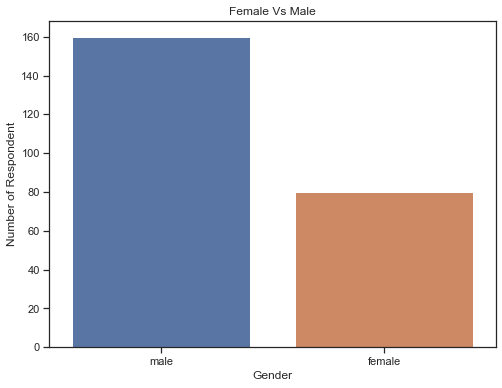

In [60]:
# Barplot
plt.figure(figsize=(8, 6))
plt.title("Female Vs Male")
ax = sns.countplot(x = sub_data['genderHH'])
# Naming labels
ax.set(ylabel = 'Number of Respondent')
ax.set(xlabel='Gender')

**Observation1:** We can see the Number Respondent of `female` is half of `Male` respondent.

[Text(0, 0.5, 'Crop Harvested'),
 Text(0.5, 0, 'Crop Label'),
 Text(0.5, 1.0, 'Harvest per crop')]

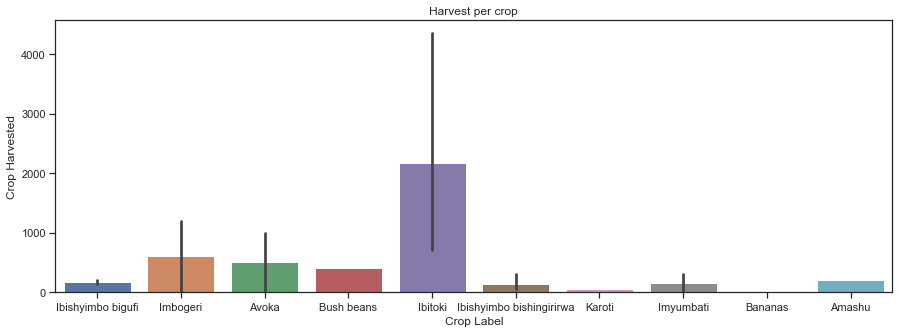

In [92]:
plt.figure(figsize = (15,5))
# plotting relationship of Harvest and crops
ax = sns.barplot(x = crops_data['cropRepeat1cropLabel'], y = crops_data['cropRepeat1cropDetailscropHarvest'])
ax.set(xlabel='Crop Label', ylabel='Crop Harvested', Title = 'Harvest per crop')

**Observation 2:** The Harvest Number Of Banana(Ibitoki) is high. Which led to another question, to see if they provide income to farmers.

[Text(0, 0.5, 'Sale Income'),
 Text(0.5, 0, 'Crop Label'),
 Text(0.5, 1.0, 'Sale Income per crop')]

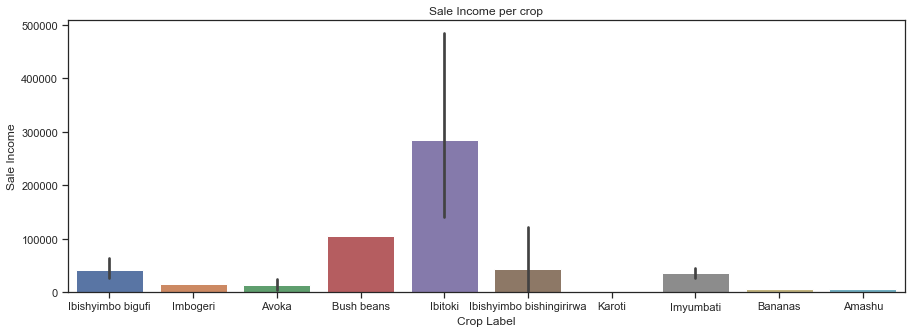

In [89]:
plt.figure(figsize = (15,5))
# plotting relationship of income and crops
ax = sns.barplot(x = crops_data['cropRepeat1cropLabel'], y = crops_data['cropRepeat1cropSalecropIncome'])
ax.set(xlabel='Crop Label', ylabel='Sale Income', Title = 'Sale Income per crop')

**Observation 3:** Banana (Ibitoki) is the crop that brings more income to Households than other crops.

[Text(0, 0.5, 'Sale Income'),
 Text(0.5, 0, 'Crop Sold'),
 Text(0.5, 1.0, 'Sale Income & crop Sold')]

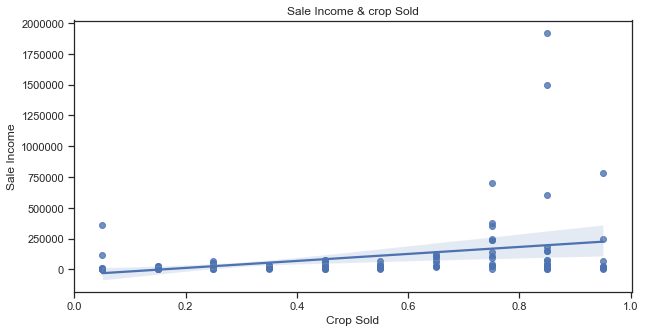

In [96]:
plt.figure(figsize = (10,5))
# plotting relationship of income and crops
ax = sns.regplot(x = crops_data['cropRepeat1cropDetailscropSold'], y = crops_data['cropRepeat1cropSalecropIncome'])
ax.set(xlabel='% Crop Sold', ylabel='Sale Income', Title = 'Sale Income & Percentage Crops Sold')

**Observation 4:** They seem to be a linear relationship Between `Sale Income` and percentage `Crop Sold`.

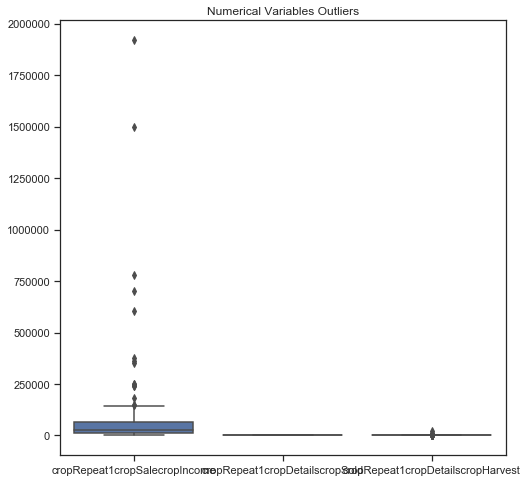

In [100]:
 # Checking outliers
numerical = ['cropRepeat1cropSalecropIncome','cropRepeat1cropDetailscropSold','cropRepeat1cropDetailscropHarvest']
plt.figure(figsize=(10,5))
plt.title("Numerical Variables Outliers")
ax = sns.boxplot(data = crops_data[numerical])


Obviously The data contains Outliers, We can check if we might reduce them, but it's not always a good idea to remove them but further investigate the reason why they are in dataset.

In [102]:
import numpy as np
# functions that removing outliers
def remove_outliers(data, numerical):  
    for i in data[numerical]:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        interQ = Q3-Q1
        LowerT = Q1 - 1.5 * interQ
        UpperT = Q3 + 1.5 * interQ
        median = np.median(crops_data[i])
        for j in data[i]:
            if j > UpperT or j < LowerT:
                data[i] = data[i].replace(j, median)

In [ ]:
remove_outliers(crops_data, numerical)

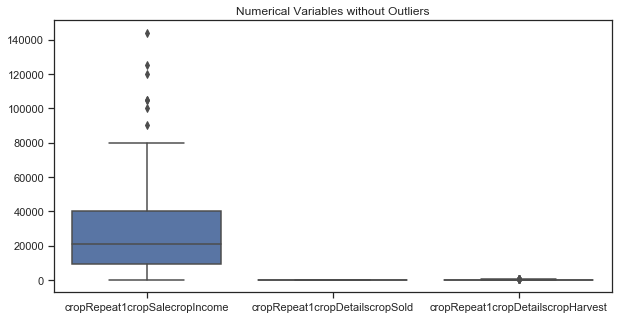

In [105]:
plt.figure(figsize=(10, 5))
plt.title("Numerical Variables without Outliers")
ax = sns.boxplot(data = crops_data[numerical])

We can check the data without outliers

[Text(0, 0.5, 'Sale Income'),
 Text(0.5, 0, '% Crop Sold'),
 Text(0.5, 1.0, 'Sale Income & Percentage Crops Sold')]

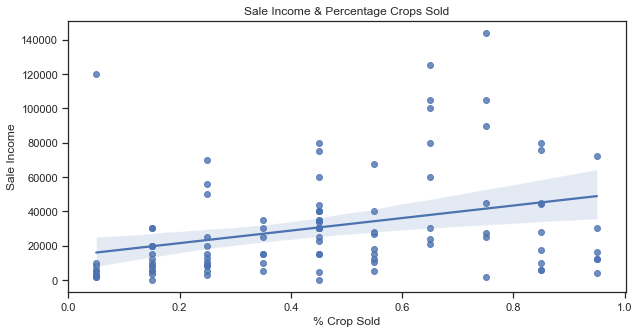

In [127]:
plt.figure(figsize = (10,5))
# plotting relationship of income and crops sold
ax = sns.regplot(x = crops_data['cropRepeat1cropDetailscropSold'], y = crops_data['cropRepeat1cropSalecropIncome'])
ax.set(xlabel='% Crop Sold', ylabel='Sale Income', Title = 'Sale Income & Percentage Crops Sold')

We can start Exploring **Dietary Data**, 
we can start with essentials like `diary`, `fruits`, `starch`, and `eggs`.

[Text(0, 0.5, 'Sale Income'),
 Text(0.5, 0, 'Crop Label'),
 Text(0.5, 1.0, 'Sale Income per crop')]

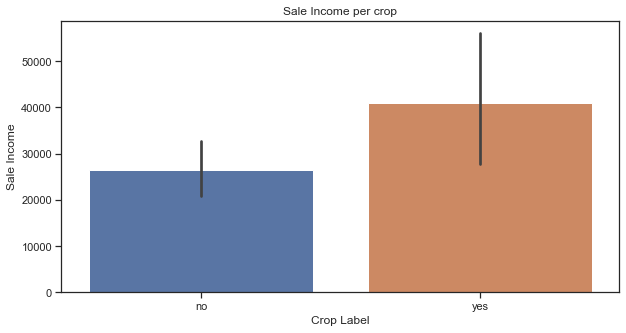

In [126]:
plt.figure(figsize = (10,5))
# plotting relationship of income and crops
ax = sns.barplot(x = diet_data['dietaryDiversity2dairy'], y = crops_data['cropRepeat1cropSalecropIncome'])
ax.set(xlabel='Crop Label', ylabel='Sale Income', Title = 'Sale Income per crop')

[Text(0, 0.5, 'Income'),
 Text(0.5, 0, 'Starch Dietary'),
 Text(0.5, 1.0, 'Sale Income vs starch')]

<Figure size 720x360 with 0 Axes>

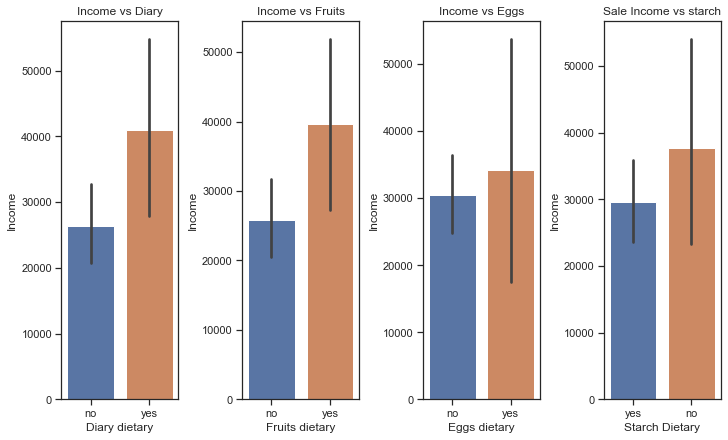

In [151]:
# multiple plots about dietary and income
plt.figure(figsize = (10,5))
fig, axis = plt.subplots(ncols=4, figsize =(10, 6), constrained_layout = True)

# For Diary and Income
sns.barplot(x = diet_data['dietaryDiversity2dairy'], y = crops_data['cropRepeat1cropSalecropIncome'], ax = axis[0])
axis[0].set(xlabel='Diary dietary', ylabel='Income', Title = 'Income vs Diary')

# For Fruits and income
sns.barplot(x = diet_data['dietaryDiversity1fruits'], y = crops_data['cropRepeat1cropSalecropIncome'], ax = axis[1])
axis[1].set(xlabel='Fruits dietary', ylabel='Income', Title = 'Income vs Fruits')
  
# For Eggs and Income
sns.barplot(x = diet_data['dietaryDiversity1eggs'], y = crops_data['cropRepeat1cropSalecropIncome'], ax= axis[2])
axis[2].set(xlabel='Eggs dietary', ylabel='Income', Title = 'Income vs Eggs')
  
# For Starch and Income
sns.barplot(x = diet_data['dietaryDiversity1starch'], y = crops_data['cropRepeat1cropSalecropIncome'], ax = axis[3])
axis[3].set(xlabel='Starch Dietary', ylabel='Income', Title = 'Sale Income vs starch')

**Observation 5:** We can see that the more income leads to the stability in dietary per houselholds.

### III. Market Orientation

After exploring the whole dataset we can turn back to the question of Market orientation. where we will focus on its effects on **household dynamics**, especially *dietary diversity* and Income but also considering *regionality* factor.

For Market orientation, we will subset data with these columns, `diet data, income, % crop sold, and regional data`.

In [153]:
#market orientation data
mo_cols = [
    'respondentNr',
 'district',
'cropRepeat1cropPosition',
 'cropRepeat1cropLabel',
 'cropRepeat1cropDetailscropProp',
 'cropRepeat1cropDetailscropHarvest',
 'cropRepeat1cropDetailscropUnits',
 'cropRepeat1cropDetailsbananaUnits',
 'cropRepeat1cropDetailscropSold',
 'cropRepeat1cropSalecropIncome',
 'cropRepeat1cropSalemarketType',
    'dietaryDiversity1starch',
 'dietaryDiversity1tubers',
 'dietaryDiversity1vegetables',
 'dietaryDiversity1fruits',
 'dietaryDiversity1meat',
 'dietaryDiversity1eggs',
 'dietaryDiversity2fish',
 'dietaryDiversity2legumes',
 'dietaryDiversity2dairy',
 'dietaryDiversity2fat',
 'dietaryDiversity2sugar',
 'dietaryDiversity2other'    
]
MO_data = full_data.loc[:, mo_cols].copy()
MO_data.head()

,respondentNr,district,cropRepeat1cropPosition,cropRepeat1cropLabel,cropRepeat1cropDetailscropProp,cropRepeat1cropDetailscropHarvest,cropRepeat1cropDetailscropUnits,cropRepeat1cropDetailsbananaUnits,cropRepeat1cropDetailscropSold,cropRepeat1cropSalecropIncome,...,dietaryDiversity1vegetables,dietaryDiversity1fruits,dietaryDiversity1meat,dietaryDiversity1eggs,dietaryDiversity2fish,dietaryDiversity2legumes,dietaryDiversity2dairy,dietaryDiversity2fat,dietaryDiversity2sugar,dietaryDiversity2other
1,1,Nyanza,beansBush,Ibishyimbo bigufi,0.15,20.0,kg,NaN,0.00,NaN,...,no,no,no,no,no,yes,no,yes,yes,no
2,2,Nyanza,beansBush,Ibishyimbo bigufi,0.85,200.0,kg,NaN,0.45,30000.0,...,yes,yes,no,no,yes,yes,yes,yes,no,no
3,3,Nyanza,beansBush,Ibishyimbo bigufi,0.55,400.0,kg,NaN,0.45,60000.0,...,yes,yes,no,no,no,yes,no,yes,yes,yes
4,4,Nyanza,amaranth,Imbogeri,0.05,15.0,kg,NaN,0.00,NaN,...,yes,no,no,no,yes,yes,no,yes,no,no
5,5,Nyanza,beansBush,Ibishyimbo bigufi,0.75,100.0,kg,NaN,0.15,20000.0,...,yes,no,no,no,yes,yes,no,yes,no,no


In [154]:
MO_data.district.value_counts()

Nyanza     80
Ruhango    80
Kamonyi    80
Name: district, dtype: int64

The above district will be our regional focus in this analysis.
Also in this analysis the crops to be based used are in `Crop Position 1` as show below.

In [155]:
MO_data.cropRepeat1cropPosition.value_counts()

beansBush        185
bananas           33
beansClimbing     10
cassava            6
amaranth           2
avocado            2
carrots            1
cabbage            1
Name: cropRepeat1cropPosition, dtype: int64

In [163]:
numerical_1 = ['cropRepeat1cropSalecropIncome']
remove_outliers(MO_data, numerical_1)

<Figure size 720x360 with 0 Axes>

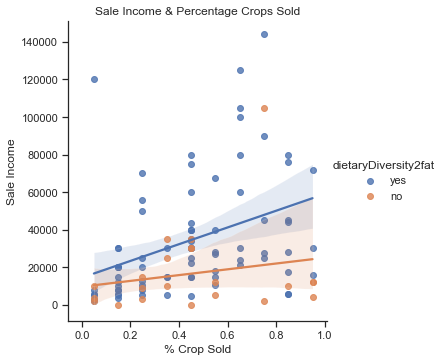

In [178]:
plt.figure(figsize = (10,5))
# plotting relationship of income and crops sold to diary diet
ax = sns.lmplot(x ='cropRepeat1cropDetailscropSold', y = 'cropRepeat1cropSalecropIncome', hue = 'dietaryDiversity2fat', data = MO_data)
ax.set(xlabel='% Crop Sold', ylabel='Sale Income', Title = 'Sale Income & Percentage Crops Sold')

To understand how dietary is affected by the relationship between Crop sold and Income, we can use `categorical scatter plots` since dietary is a *categorical variable*. 

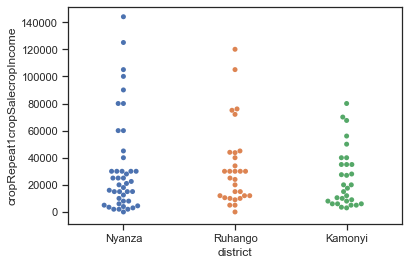

In [252]:
sns.swarmplot(x=MO_data['district'], y = MO_data['cropRepeat1cropSalecropIncome'])

From the above we can see `Nyanza` has more sale income then other districts

## Modelling

In [199]:
col = ['district',
       'cropRepeat1cropDetailscropProp',
       'cropRepeat1cropDetailscropHarvest',
       'cropRepeat1cropDetailscropSold',
       'cropRepeat1cropSalecropIncome',
       'dietaryDiversity1fruits']
data = MO_data.loc[:, col].copy()

We are going to build a model to predict dietary stability of fruits, if we have sold crops, income variables and other variables.

We start by separating data into features and target valiable.
`X` is going to be our feature and `Y` as our target valiable.

In [200]:
#dropping the fruits column
X = data.drop(['dietaryDiversity1fruits'], axis = 1)
Y = data[['dietaryDiversity1fruits']]

In [201]:
#Selecting categorical columns using cardinality
low_cardinality_cols = [colName for colName in X.columns if X[colName].nunique() < 6 or X[colName].dtype == 'object']

**==> Encoding Data:** Let's Perform **One Hot Encoding** to feature data. Why? => most model don't accept "words" written variables they prefer numbers, and we are trying to transform districts into numbers.

In [202]:
X = pd.get_dummies(X, columns = low_cardinality_cols, drop_first=True)
X.head()

,cropRepeat1cropDetailscropProp,cropRepeat1cropDetailscropHarvest,cropRepeat1cropDetailscropSold,cropRepeat1cropSalecropIncome,district_Nyanza,district_Ruhango
1,0.15,20.0,0.00,NaN,1,0
2,0.85,200.0,0.45,30000.0,1,0
3,0.55,400.0,0.45,60000.0,1,0
4,0.05,15.0,0.00,NaN,1,0
5,0.75,100.0,0.15,20000.0,1,0


In [206]:
# we will fill NaN values with 0 since no data is available
X.fillna(0, inplace=True)
X.head()

,cropRepeat1cropDetailscropProp,cropRepeat1cropDetailscropHarvest,cropRepeat1cropDetailscropSold,cropRepeat1cropSalecropIncome,district_Nyanza,district_Ruhango
1,0.15,20.0,0.00,0.0,1,0
2,0.85,200.0,0.45,30000.0,1,0
3,0.55,400.0,0.45,60000.0,1,0
4,0.05,15.0,0.00,0.0,1,0
5,0.75,100.0,0.15,20000.0,1,0


Now with Features ready, we can convert The "Yes" and "No" in Target Valiable with "1s" and "0s" instead.

In [229]:
Y = Y.replace({'dietaryDiversity1fruits': {'yes': 1, 'no': 0}})
Y.dietaryDiversity1fruits.value_counts()

0    167
1     73
Name: dietaryDiversity1fruits, dtype: int64

**==>Splitting data**: To understand model performance, we divide our dataset into training and testing datasets.

Let's split dataset by using function train_test_split.

In [231]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

**==>Model Development and Prediction**:
On this task we will use `logistic regression model`, then fit it with training dataset and test it with testing dataset using `predict()` methods.

In [244]:
# import the class
from sklearn.linear_model import LogisticRegression as LogReg

# instantiate the model (using the default parameters) & fit  the model
logisticReg = LogReg().fit(X_train, y_train.values.reshape(-1,))

# testing the model
y_pred=logisticReg.predict(X_test)

**==>Model Evaluation using Confusion Matrix**: 
We will use the confusion matrix to evaluate the performance of our classification model.

In [245]:
# import the metrics class
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[13, 21],
       [11, 15]], dtype=int64)

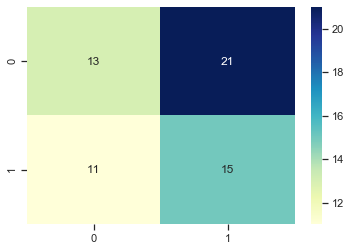

In [247]:
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 13 and 15 are actual predictions, and 21 and 11 are incorrect predictions.

**==>Confusion Matrix Evaluation Metrics**

In [248]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.4666666666666667
Precision: 0.4166666666666667
Recall: 0.5769230769230769


With the accuracy of `46%` we can say the classification modal fails to classify, means there is still a big room to grow our model. 
we can also see that on `Receiver Operating Characteristic(ROC) curve`, that shows a tradeoff between sensitivity and specificity of our model.

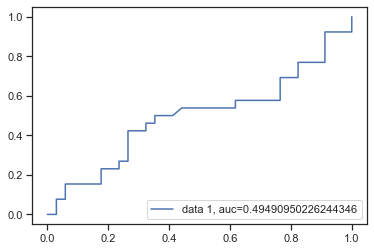

In [250]:
y_pred_proba = logisticReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

With `AUC` score less than 0.5, means this classifier is not a good classifier.

**==>There are ways to Improve our Model:**
1. Feature Scaling and Normalization: where we normalize all features to the same scale.
2. Class Imbalance: we can look for number of yes and no, if one is higher than other.
3. Optimizing Log loss & F1 scores.
4. Tuning Hyperparameter: To improve our accuracy, we can perform Grid-search to tune hyperparameter of our model.
5. Explore other classifiers: such as Support vector machines and Tree-based classifiers.
6. Increase number of features in our model.

## Results and Discussion <a name = "Results"></a>

Through this analysis, we found that there are entries of `240` households, across three districts of Rwanda, *Nyanza, Ruhango and Kamonyi* and There are 160 men and 80 women participated in the survey.

While some of entries were left with no data, We did fill them with `0` for the purpose of analysis. From the provided data, we found that `Banana (Igitoki)` crop has a big number of Harvest and It is also the crop that generate High **Sale Income** to farmers.

Data had `Outliers` in Sale Income, in this case it is a good idea to investigate the outliers in Income data rather than ignoring them, since this might show different prices on market on a specific crop.

Regarding Market Orientation, there is a linear relationship between Crop sold and Income per households. The more Market orientation the more Income to farmers. This blings to another subject of `Dietary diversity`, which also seems to be impacted by the `Sale income`. 

*For Example:* The Households with more income seems to have essential and healthy meal like `Diary, Eggs, Fruits and Starch`, and even expensive foods like `Meat`and `Fish`.
From This we can say that, having a Good Market Orientation affects positively farmers and improves their `diatary` since they have more `Sales income`.

The regionality factor shows that Farmers in *Nyanza* earns more than their colleagues in *Ruhango and Kamonyi*.

**The houshold that have more than `0.5` percentage of sold crops, that farms Banana(Ibitoki) and Lives in Nyanza will have a good dietary** and this is the characteristics of households that explains market orientation.


## Conclusion <a name ="Conclusion"></a>

The project's purpose was to analyse the effects of Market orientation on household dynamics.

By conducting rough and quick analysis, we found the effect of market orientation to farmers which is positive. However, we can't say a hundred percent that we reached the goal of eradicating hunger. There are couple steps One Acre Fund will take to investigate effects of Market orientation as highlighted below and How One Acre fund(**OAF**) will use these information.

* Conducting customer orientation analysis, from this OAF will understand how farmers could statisfy their clients or market, and create farmers value in a continuous basis for their sustainable growth.
* Conducting competitor orientation analysis, where OAF will understand competitors strengths and weaknesses and make strategies to produce competitive advantage to organization itself and its clients (Farmers).
* Regarding Nutritient security, OAF would collect that on `How often` farmers get access to essential and healthy dietary in a month and/or weekly, where this information will show if there is a huge *positive impact* on farmers nutrient security and *stability* in their dietary adverstity.
* Farmers face overproduction and marketing among other risks that impact their income, helping them to overcome this by Learning and conducting market analysis for them could impact them positively and hence improve their income.

OAF has done a tremendous work for farmers in past years and it is a good time to be with farmers especially in these where there is new challenges that are being surfaced in different sectors including technology, health and economy. OAF will have to make a data-driven decision to farmers without bias and clear vision and goal to sustain farmers growth.

The link is for Repository of The assessment
<a href="https://github.com/JPaul23/OAF-assessment/" >here.</a>

## Change Log

| Date (YYYY-MM-DD) | Change Description                           |
| ----------------- | -------------------------------------------- |
| 2022-03-30        | Understanding Business Problem            |
| 2022-03-30        |  Methodology & Conducting Analysis                           |
| 2022-03-31        | Modelling                  |
| 2022-03-31        | Results and Conclusion                       |